# Pretrained Models Test


### Import Libraries

In [1]:
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b0, efficientnet_b2, efficientnet_b4
from torchsig.models.iq_models.xcit.xcit import xcit_nano, xcit_tiny12
from torchsig.datasets.sig53 import Sig53
from Train_evaluate import *
import torchsig.transforms as ST
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn, optim



----
### Data reading

In [2]:
# Specify Sig53 Options
root = "../../../../data/torchsig/sig53/"
train = False
impaired = False
class_list = list(Sig53._idx_to_name_dict.values())
transform = ST.Compose([
    ST.RandomPhaseShift(phase_offset=(-1, 1)),
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=class_list)


# Instantiate the Sig53 Clean Validation Dataset
train = False
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_val))
data, label = sig53_clean_val[idx]
print("Dataset length: {}".format(len(sig53_clean_val)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 9964
Data shape: (2, 4096)
Label Index: 42
Label Class: ofdm-72


----
### Dataloaders

In [3]:
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=16,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

In [5]:
class_family_dict = {
        "4ask": "ask",
        "8ask": "ask",
        "16ask": "ask",
        "32ask": "ask",
        "64ask": "ask",
        "ook": "pam",
        "4pam": "pam",
        "8pam": "pam",
        "16pam": "pam",
        "32pam": "pam",
        "64pam": "pam",
        "2fsk": "fsk",
        "2gfsk": "fsk",
        "2msk": "fsk",
        "2gmsk": "fsk",
        "4fsk": "fsk",
        "4gfsk": "fsk",
        "4msk": "fsk",
        "4gmsk": "fsk",
        "8fsk": "fsk",
        "8gfsk": "fsk",
        "8msk": "fsk",
        "8gmsk": "fsk",
        "16fsk": "fsk",
        "16gfsk": "fsk",
        "16msk": "fsk",
        "16gmsk": "fsk",
        "bpsk": "psk",
        "qpsk": "psk",
        "8psk": "psk",
        "16psk": "psk",
        "32psk": "psk",
        "64psk": "psk",
        "16qam": "qam",
        "32qam": "qam",
        "32qam_cross": "qam",
        "64qam": "qam",
        "128qam_cross": "qam",
        "256qam": "qam",
        "512qam_cross": "qam",
        "1024qam": "qam",
        "ofdm-64": "ofdm",
        "ofdm-72": "ofdm",
        "ofdm-128": "ofdm",
        "ofdm-180": "ofdm",
        "ofdm-256": "ofdm",
        "ofdm-300": "ofdm",
        "ofdm-512": "ofdm",
        "ofdm-600": "ofdm",
        "ofdm-900": "ofdm",
        "ofdm-1024": "ofdm",
        "ofdm-1200": "ofdm",
        "ofdm-2048": "ofdm",
    }

----
### Initiate Model
Below, we load a pretrained EfficientNet-B0 model, and then conform it to a PyTorch LightningModule for training.

In [3]:
model = efficientnet_b0(
    pretrained=True,
    path="efficientnet_b0.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()


----
### Evaluation

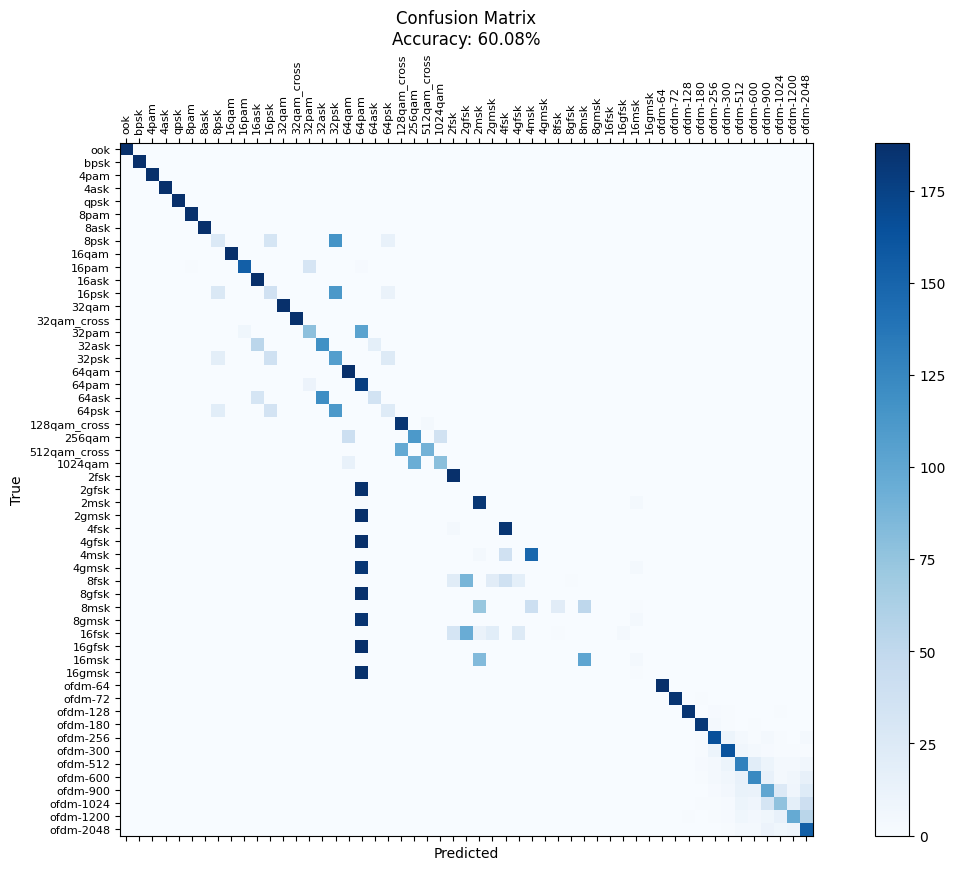

In [10]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

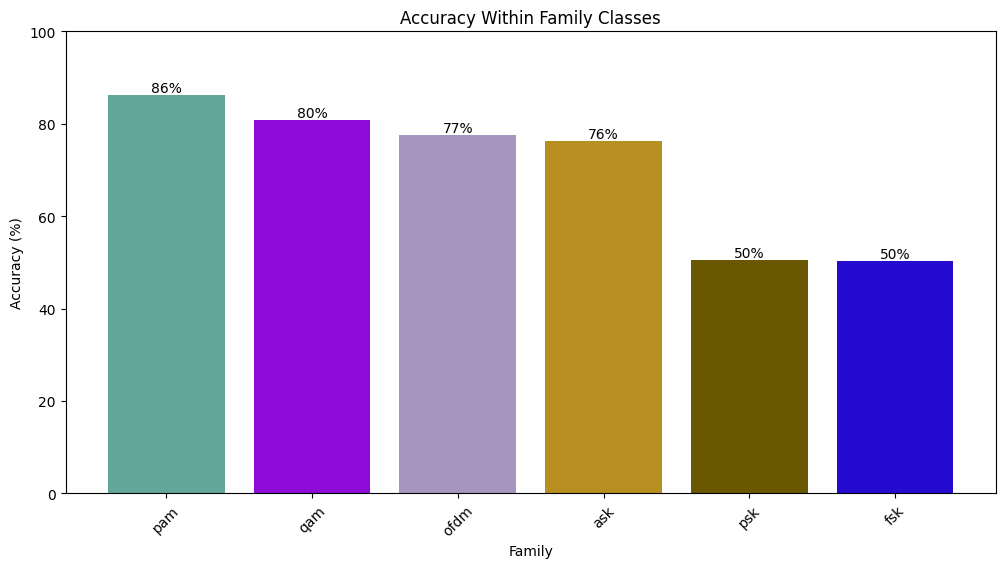

In [12]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)

## EfficientNet B2

In [38]:
model = efficientnet_b2(
    pretrained=True,
    path="efficientnet_b2.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

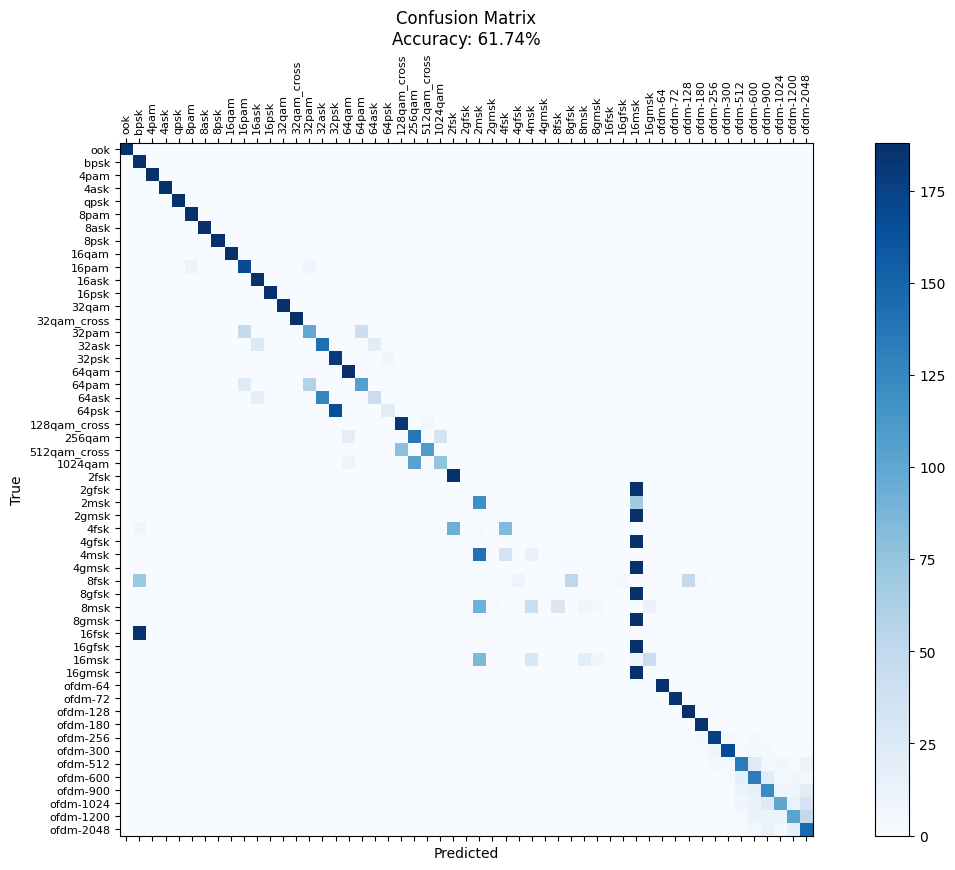

In [39]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

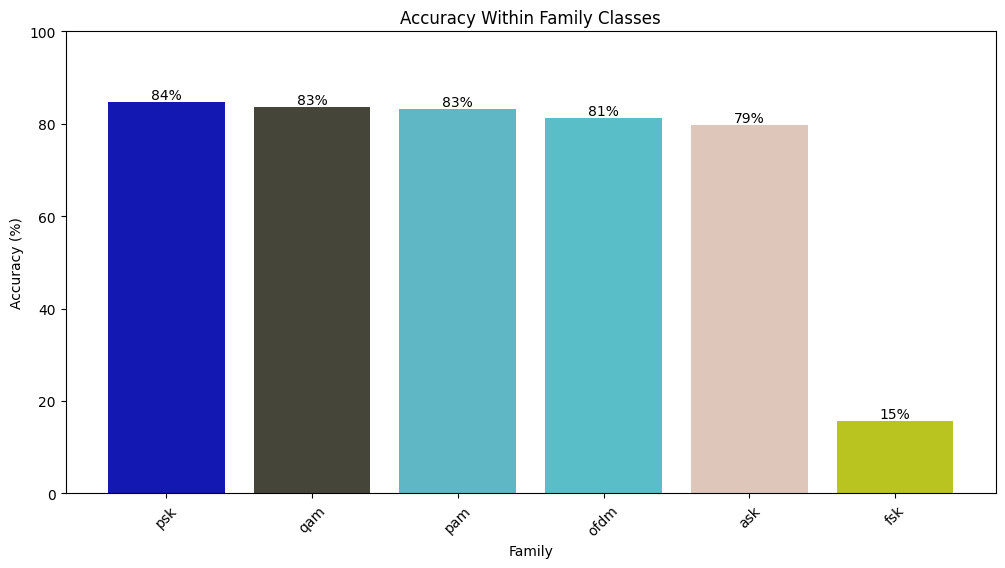

In [40]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


## EfficientNet B4

In [41]:
model = efficientnet_b4(
    pretrained=True,
    path="efficientnet_b4.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

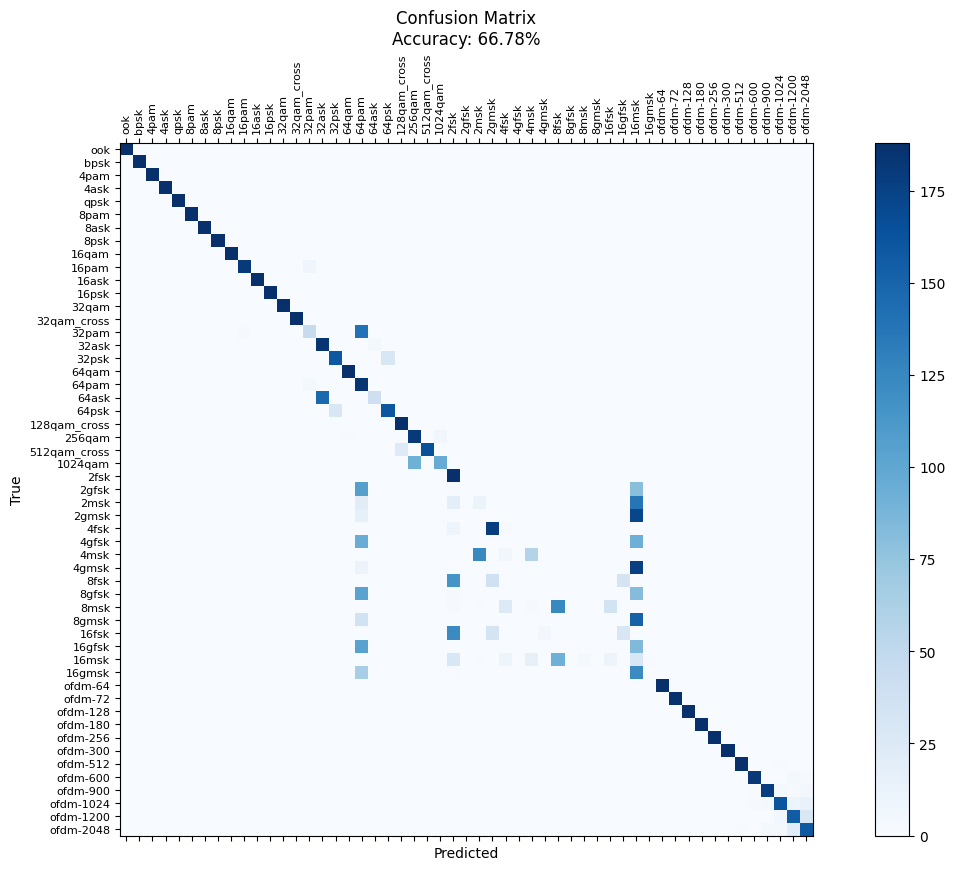

In [42]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

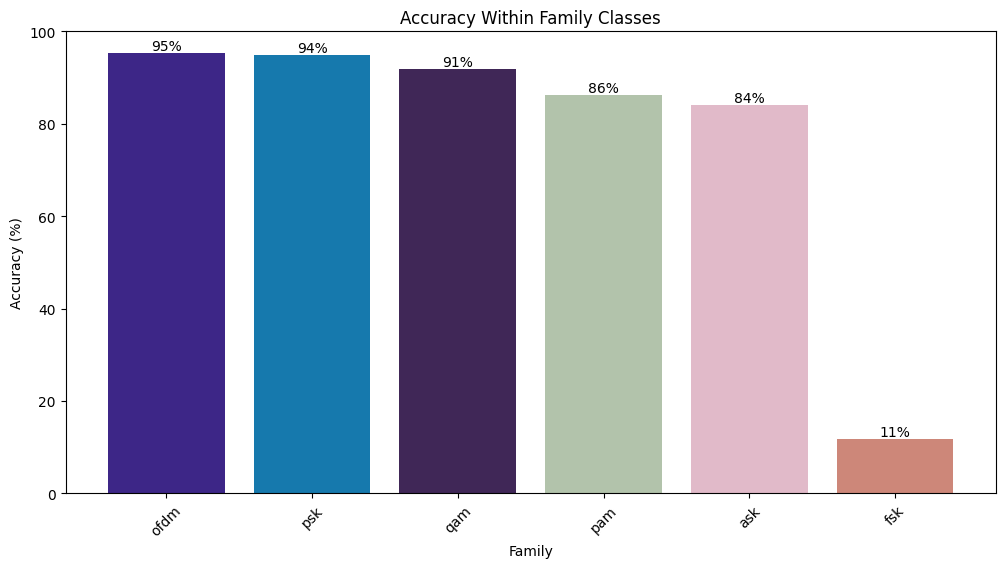

In [46]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


## XCiT

###  XCiT Nano

In [10]:
model = xcit_nano(
    pretrained=True,
    path="xcit_nano.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

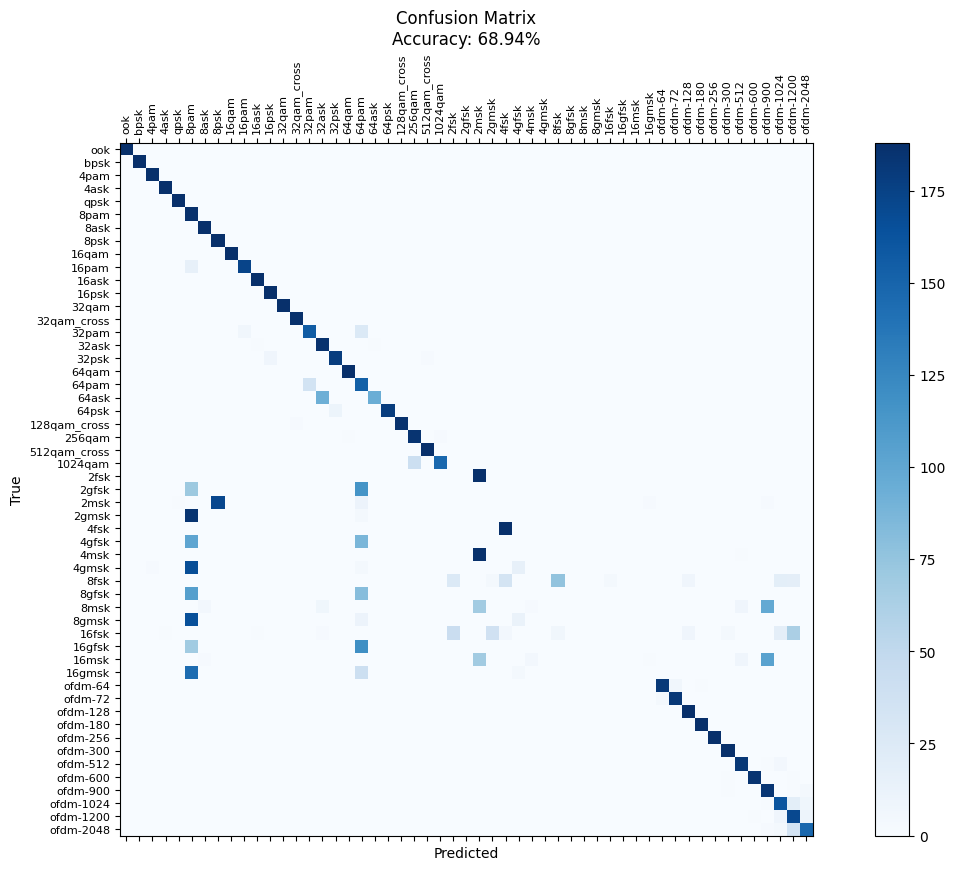

In [11]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

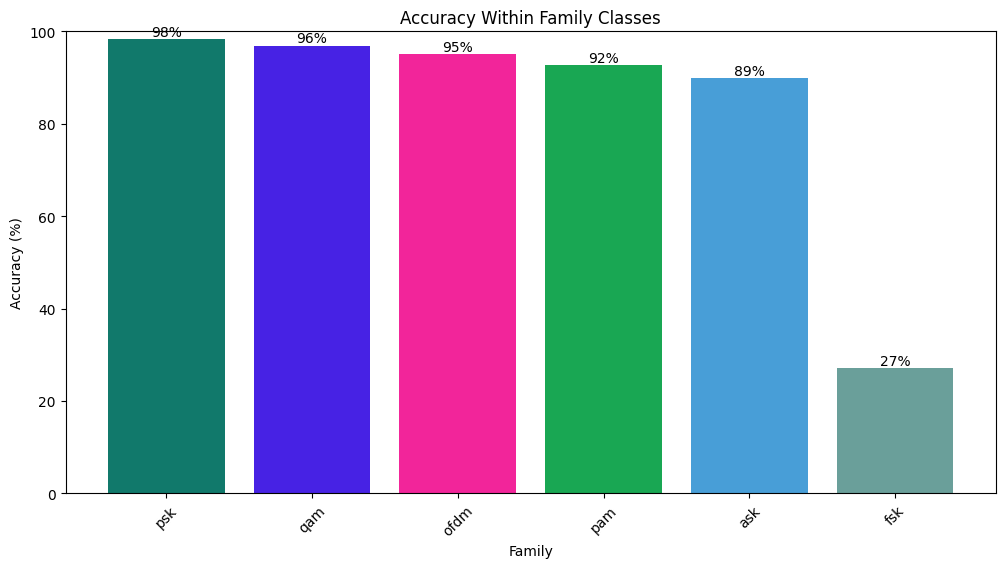

In [12]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


###  XCiT Tiny

In [21]:
model = xcit_tiny12(
    pretrained=True,
    path="xcit_tiny.pt",
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Downloading...
From: https://drive.google.com/uc?id=1DKd5E3WwEZxt99qCeSIzvgc1AWEEfdue
To: /home/mutaz/torchsig/gradiant/xcit_tiny.pt
100%|██████████| 25.6M/25.6M [00:00<00:00, 29.3MB/s]


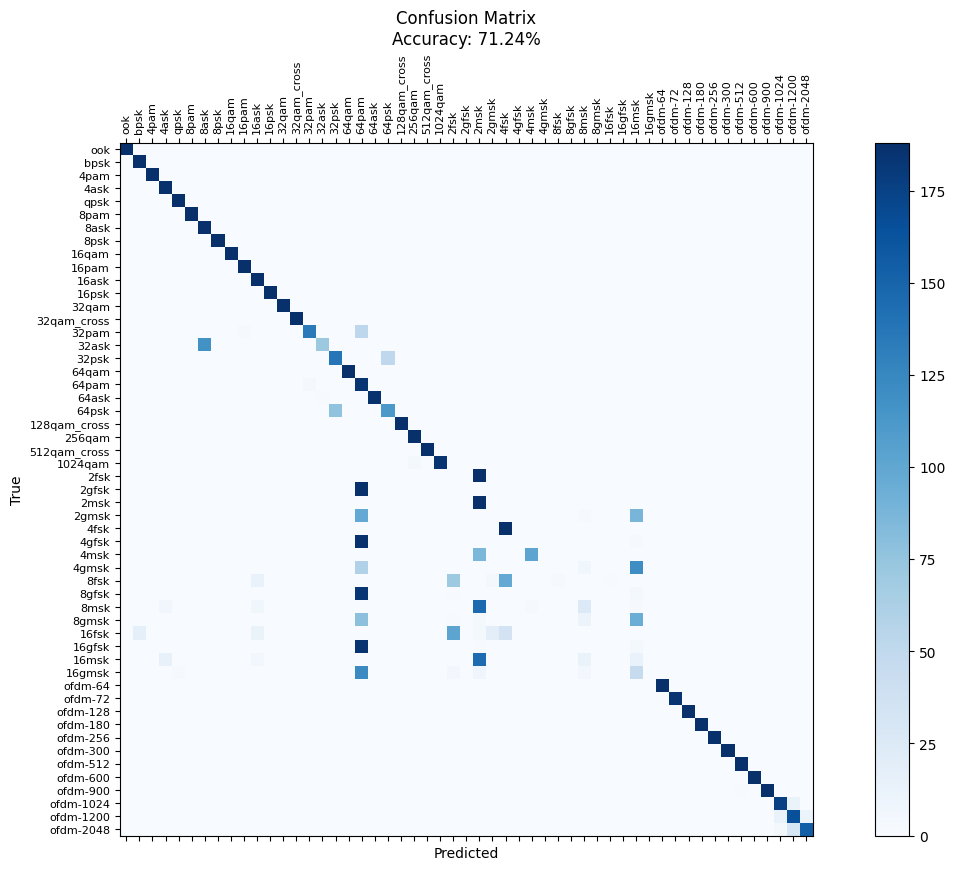

In [22]:
all_predictions, all_labels = evaluate_pretrained(model, test_dataloader, device, class_list)

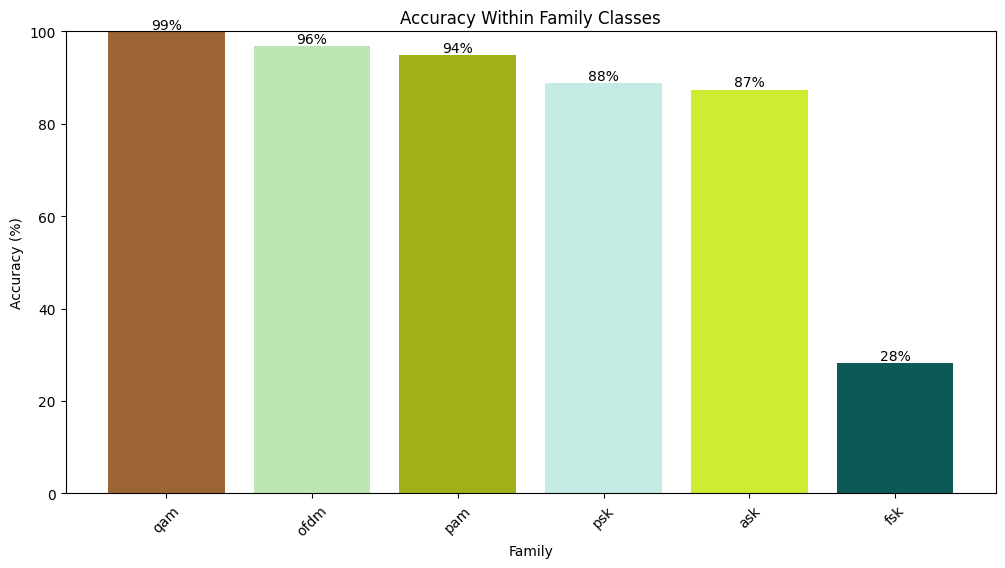

In [23]:
evaluate_family_accuracy(all_predictions, all_labels, class_list, class_family_dict)


### Time per batch evaluation testing

bo

In [12]:
def prepare(model_type, data, batch_size, device_type):
    # Load the specified model
    if model_type == "efficientnet_b0":
        model = efficientnet_b0(
            pretrained=True,
            path="efficientnet_b0.pt",
        )
    elif model_type == "efficientnet_b2":
        model = efficientnet_b2(
            pretrained=True,
            path="efficientnet_b2.pt",
        )
    elif model_type == "efficientnet_b4":
        model = efficientnet_b4(
            pretrained=True,
            path="efficientnet_b4.pt",
        )
    elif model_type == "xcit_nano":
        model = xcit_nano(
            pretrained=True,
            path="xcit_nano.pt",
        )
    elif model_type == "xcit_tiny12":
        model = xcit_tiny12(
            pretrained=True,
            path="xcit_tiny.pt",
        )
    else:
        raise ValueError("Unsupported model type")

    # Create DataLoader with specified dataset and batch size
    test_dataloader = DataLoader(
        dataset=data,
        batch_size=batch_size,
        num_workers=8,
        shuffle=False,
        drop_last=True,
    )

    # Move model to specified device (cuda or cpu)
    device = torch.device(device_type)
    model = model.to(device)

    return model, test_dataloader, device

criterion = nn.CrossEntropyLoss()


In [14]:
criterion = nn.CrossEntropyLoss()

model, dataload, device = prepare("efficientnet_b0",sig53_clean_val,32, 'cuda' )

batch_size = [2,4,8,16,32,64,128,256]

loss, accuracy, labels, predictions, batch_time = evaluate_model(model, test_dataloader, criterion, device)


In [17]:
batch_sizes = [128]
models = ["xcit_nano"]
devices = ['cuda', 'cpu']

for model_type in models:
    for batch_size in batch_sizes:
        for device_type in devices:
            print("model is", model_type)
            print("batch size is", batch_size)
            print("device is", device_type)

            # Prepare the model, dataloader, and device
            model, test_dataloader, device = prepare(model_type, dataload, batch_size, device_type)

            # Now you can use model, test_dataloader, criterion, and device in your evaluate_model function
            loss, accuracy, labels, predictions, batch_time = evaluate_model(model, test_dataloader, criterion, device)

model is xcit_nano
batch size is 128
device is cuda


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/mutaz/.pyenv/versions/3.9.16/envs/torchsig/lib/python3.9/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
TypeError: 'DataLoader' object is not subscriptable
